In [21]:
import numpy as np
import matplotlib.pyplot as plt

### FUNCTION 1

##### In order to solve the Second order Differential Equation, we will define a function which will express the scond order in two first order ODE's to further solve the equation nuemrically

In [22]:
def lane_emden_rhs(xi, y, n):
    
    theta, phi = y
    if xi == 0:
        return [phi, 0]  # Avoid singularity by division by zero when radius is zero i.e. zero
    dtheta_dxi = phi
    dphi_dxi = - (2/xi) * phi - theta**n
    return [dtheta_dxi, dphi_dxi]

### FUNCTION 2

#### We now use the core concept of thr RK4 Integrator explained in the article

We use array's here since we are trying to build a code for numerous polytropic indices. Hence now we dont need to define 8 functions since we are inputting an array in each giving us both the outputs using only 4 functions

In [23]:
def rk4_step(func, xi, y, h, n):

    k1 = np.array(func(xi, y, n))
    k2 = np.array(func(xi + 0.5*h, y + 0.5*h*k1, n))
    k3 = np.array(func(xi + 0.5*h, y + 0.5*h*k2, n))
    k4 = np.array(func(xi + h, y + h*k3, n))
    return y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)


### FUNCTION 3

#### By numerically solving, we have the values of y as it progresses wrt xi i.e. dimensionless radial distance 

We assume some analytical expressions for smalll xi for further calculations

/var/folders/x2/mg4hfy393fngj494k59zy5z80000gn/T/ipykernel_3116/3696115067.py:7: RuntimeWarning: invalid value encountered in scalar power
  dphi_dxi = - (2/xi) * phi - theta**n


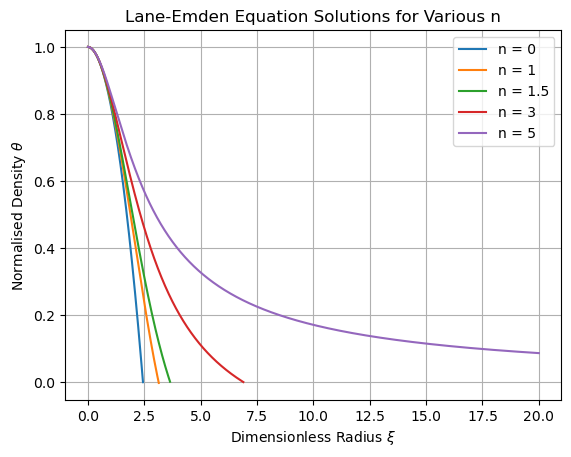

In [24]:
def solve_lane_emden(n, h=0.01, xi_max=20):

    xi_vals = [h]
    theta_vals = [1 - (1/6)*h**2] 
    phi_vals = [-h/3]              # dθ/dξ ≈ -ξ/3 at small ξ

    xi = h
    y = np.array([theta_vals[0], phi_vals[0]])

    while y[0] > 0 and xi <= xi_max:
        y = rk4_step(lane_emden_rhs, xi, y, h, n)
        xi += h
        xi_vals.append(xi)
        theta_vals.append(y[0])
        phi_vals.append(y[1])

    return np.array(xi_vals), np.array(theta_vals), np.array(phi_vals)

for n in [0,1,1.5,3,5]:
    xi, theta, _ = solve_lane_emden(n)
    plt.plot(xi, theta, label=f'n = {n}')

plt.xlabel("Dimensionless Radius " r"$\xi$")
plt.ylabel("Normalised Density " r"$\theta$")
plt.title('Lane-Emden Equation Solutions for Various n')
plt.grid(True)
plt.legend()
plt.show()

